### Introduction

#### Objective

The problem will be project will have 3 parts - classification, predicting if a cusromer churned or not, segment those customers into 3 segments high, medium and low, and regression, predicting the the revenue impact of the churners and how to apply the retention strategy.

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import LinearSVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, make_scorer, confusion_matrix, mean_squared_error, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier

from scipy.stats import randint, uniform

import warnings
warnings.filterwarnings("ignore")

# sets the maximum number of columns that will be displayed in a dataframe to 200 for improved data viewing
pd.set_option('display.max_columns', None)

In [95]:
# Set Style and Preferences
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['grid.color'] = 'lightgray'
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 12

# Define Color Palette
color_palette = ['#023047', '#e85d04', '#0077b6', '#ff8200', '#0096c7', '#ff9c33']
sns.set_palette(sns.color_palette(color_palette))

# Display all columns
pd.set_option('display.max_columns', None)

In [96]:
raw_data = pd.read_csv('../data/raw/Telecom_Data.csv')

In [97]:
raw_data.head()

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer
0,hthjctifkiudi0,1,1,71638,Female,36.0,No,No,0.0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870,US,33.52,-91.43,273.07,18.88,78.59,280.32,30.970000,5.71,1.79,25.71,175.56,0.470000,0,5.11,0.65,13.99,121.51,168.40,67.61,115.69,52.22,18.71,0,0.26,11.53,46.42,18,NaN,38.30,219.25,Not Applicable,Not Applicable,NaN,NaN,214.99,1,Yes,9.0,Yes,Yes,Yes,DSL,27,No,No,Yes,Yes,No,Yes,Yes,Yes,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,Churned,A
1,uqdtniwvxqzeu1,6,6,72566,Male,36.0,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870,US,36.22,-92.08,-329.96,69.46,72.08,255.73,148.800000,30.00,7.61,308.29,265.20,10.820000,0,1.23,905.51,1.69,212.93,155.19,29.04,9.15,38.89,0.84,0,0.05,32.51,25.53,1183,0.0,0.00,0.00,0,0,0.0,1.0,0.00,0,No,0.0,Yes,Yes,No,NaN,14,No,Yes,No,No,Yes,No,No,No,Bank Withdrawal,jucxaluihiluj82863,4,Not Applicable,Not Applicable,Stayed,F
2,uqdtniwvxqzeu1,7,6,72566,Male,36.0,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870,US,36.22,-92.08,101.22,1012.60,115.26,52.95,1151.693063,103.28,15.71,244.20,15.19,61.837211,0,13.14,455.15,115.63,121.80,699.39,44.49,83.59,914.70,13.25,0,0.06,13.05,5.62,295,7.0,14.83,967.95,-9.4,106.3,1.0,1.0,85.87,0,Yes,6.0,Yes,No,Yes,Cable,82,No,No,Yes,No,Yes,No,No,Yes,Credit Card,vjskkxphumfai57182,3,Not Applicable,Not Applicable,Stayed,No Offer
3,uqdtniwvxqzeu1,8,6,72566,Male,36.0,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870,US,36.22,-92.08,215.48,84.18,99.85,140.51,4006.990000,280.86,6.33,346.14,103.15,183.530000,0,33.88,495.60,14.01,658.96,195.02,144.11,50.18,2.35,623.94,0,0.07,69.13,10.62,354,1.0,264.90,268.11,-5.15,77.53,0.0,1.0,268.38,0,Yes,10.0,Yes,No,Yes,Fiber Optic,57,No,No,Yes,No,Yes,No,No,Yes,Wallet Balance,cdwbcrvylqca53109,4,Not Applicable,Not Applicable,Stayed,J
4,uqdtniwvxqzeu1,9,6,72566,Male,36.0,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870,US,36.22,-92.08,636.55,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0,0.00,0.00,0.00,138.85,201.92,19.89,15.91,23.78,16.01,0,0.03,64.35,36.18,0,NaN,52.78,370.59,Not Applicable,Not Applicable,NaN,NaN,399.84,0,Yes,1.0,No,No,Yes,Fiber Optic,38,No,No,No,No,No,Yes,No,Yes,Credit Card,whqrmeulitfj98550,1,Not Applicable,Not Applicable,Stayed,No Offer


### Basic Data Cleaning and Creating Train/Test Split

We'll start by creating a copy of the data we've just read in.

In [98]:
df = raw_data.copy()

In [99]:
# Replace 'Not Applicable' with 0 in 'arpu_4g'
df['arpu_4g'] = df['arpu_4g'].replace('Not Applicable', 0)

# Replace 'Not Applicable' with 0 in 'arpu_5g'
df['arpu_5g'] = df['arpu_5g'].replace('Not Applicable', 0)

# Convert 'arpu_4g' to float data type
df['arpu_4g'] = df['arpu_4g'].astype(float)

# Convert 'arpu_5g' to float data type
df['arpu_5g'] = df['arpu_5g'].astype(float)

In [100]:
# List of service columns to map
service_cols = [
    'Phone Service', 'Multiple Lines', 'Internet Service',
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
    'Streaming Music', 'Unlimited Data'
]

# Map 'Yes' to 1, 'No' to 0 (you can extend if there are other categories)
service_mapping = {
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0
}

# Apply mapping
for col in service_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].map(service_mapping)

# Now you can safely aggregate
df['total_services'] = df[[
    'Phone Service', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Unlimited Data'
]].sum(axis=1)

df['total_streaming_services'] = df[[
    'Streaming TV', 'Streaming Movies', 'Streaming Music'
]].sum(axis=1)

In [101]:
# Combine 4G and 5G volumes
df['total_data_usage_mb'] = df['vol_4g'].fillna(0) + df['vol_5g'].fillna(0)

# Total outgoing calls
outgoing_cols = [
    'roam_og', 'loc_og_t2t', 'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c',
    'std_og_t2t', 'std_og_t2m', 'std_og_t2f', 'std_og_t2c',
    'isd_og', 'spl_og', 'og_others'
]
df['total_outgoing_calls'] = df[outgoing_cols].fillna(0).sum(axis=1)

# Total incoming calls
incoming_cols = [
    'roam_ic', 'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f',
    'std_ic_t2t', 'std_ic_t2m', 'std_ic_t2f', 'std_ic_t2o',
    'isd_ic', 'spl_ic', 'ic_others'
]
df['total_incoming_calls'] = df[incoming_cols].fillna(0).sum(axis=1)

# Create Tenure feature
df['tenure_months'] = df['Month'] - df['Month of Joining'] + 1

In [102]:
df.head()

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer,total_services,total_streaming_services,total_data_usage_mb,total_outgoing_calls,total_incoming_calls,tenure_months
0,hthjctifkiudi0,1,1,71638,Female,36.0,No,No,0.0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870,US,33.52,-91.43,273.07,18.88,78.59,280.32,30.970000,5.71,1.79,25.71,175.56,0.470000,0,5.11,0.65,13.99,121.51,168.40,67.61,115.69,52.22,18.71,0,0.26,11.53,46.42,18,NaN,38.30,219.25,0.00,0.00,NaN,NaN,214.99,1,Yes,9.0,1,1.0,1,DSL,27,0,0,1,1,0,1,1,1.0,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,Churned,A,5.0,2,257.55,618.870000,621.23,1
1,uqdtniwvxqzeu1,6,6,72566,Male,36.0,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870,US,36.22,-92.08,-329.96,69.46,72.08,255.73,148.800000,30.00,7.61,308.29,265.20,10.820000,0,1.23,905.51,1.69,212.93,155.19,29.04,9.15,38.89,0.84,0,0.05,32.51,25.53,1183,0.0,0.00,0.00,0.00,0.00,0.0,1.0,0.00,0,No,0.0,1,1.0,0,NaN,14,0,1,0,0,1,0,0,0.0,Bank Withdrawal,jucxaluihiluj82863,4,Not Applicable,Not Applicable,Stayed,F,2.0,1,0.00,2006.960000,573.59,1
2,uqdtniwvxqzeu1,7,6,72566,Male,36.0,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870,US,36.22,-92.08,101.22,1012.60,115.26,52.95,1151.693063,103.28,15.71,244.20,15.19,61.837211,0,13.14,455.15,115.63,121.80,699.39,44.49,83.59,914.70,13.25,0,0.06,13.05,5.62,295,7.0,14.83,967.95,-9.40,106.30,1.0,1.0,85.87,0,Yes,6.0,1,0.0,1,Cable,82,0,0,1,0,1,0,0,1.0,Credit Card,vjskkxphumfai57182,3,Not Applicable,Not Applicable,Stayed,No Offer,4.0,1,982.78,2344.040274,2908.55,2
3,uqdtniwvxqzeu1,8,6,72566,Male,36.0,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870,US,36.22,-92.08,215.48,84.18,99.85,140.51,4006.990000,280.86,6.33,346.14,103.15,183.530000,0,33.88,495.60,14.01,658.96,195.02,144.11,50.18,2.35,623.94,0,0.07,69.13,10.62,354,1.0,264.90,268.11,-5.15,77.53,0.0,1.0,268.38,0,Yes,10.0,1,0.0,1,Fiber Optic,57,0,0,1,0,1,0,0,1.0,Wallet Balance,cdwbcrvylqca53109,4,Not Applicable,Not Applicable,Stayed,J,4.0,1,533.01,5710.850000,1838.56,3
4,uqdtniwvxqzeu1,9,6,72566,Male,36.0,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870,US,36.22,-92.08,636.55,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0,0.00,0.00,0.00,138.85,201.92,19.89,15.91,23.78,16.01,0,0.03,64.35,36.18,0,NaN,52.78,370.59,0.00,0.00,NaN,NaN,399.84,0,Yes,1.0,0,0.0,1,Fiber Optic,38,0,0,0,0,0,1,0,1.0,Credit Card,whqrmeulitfj98550,1,Not Applicable,Not Applicable,Stayed,No Offer,2.0,1,423.37,0.000000,516.92,4


In [103]:
columns_to_keep_and_rename = {
    'Customer ID': 'customer_id',
    'Month of Joining': 'month_of_joining',
    'Gender': 'gender',
    'Age': 'age',
    'Married': 'married',
    'Number of Dependents': 'number_of_dependents',
    'arpu': 'arpu',
    'total_rech_amt': 'total_recharge_amount',
    'total_rech_data': 'total_recharge_data',
    'arpu_5g': 'arpu_5g',
    'arpu_4g': 'arpu_4g',
    'Churn Value': 'churn',
    'Referred a Friend': 'referred_a_friend',
    'Number of Referrals': 'number_of_referrals',
    'Phone Service': 'phone_service',
    'Multiple Lines': 'multiple_lines',
    'Internet Type': 'internet_type',
    'Payment Method': 'payment_method',
    'Satisfaction Score': 'satisfaction_score',
    'offer': 'offer',
    'total_services': 'total_services',
    'total_streaming_services': 'total_streaming_services',
    'total_data_usage_mb': 'total_data_usage_mb',
    'total_outgoing_calls': 'total_outgoing_calls',
    'total_incoming_calls': 'total_incoming_calls',
    'Month' : 'month',
    'tenure_months' : 'tenure_months'
}

df_clean = df[list(columns_to_keep_and_rename.keys())].rename(columns=columns_to_keep_and_rename)

In [104]:
df_clean.head()

,customer_id,month_of_joining,gender,age,married,number_of_dependents,arpu,total_recharge_amount,total_recharge_data,arpu_5g,arpu_4g,churn,referred_a_friend,number_of_referrals,phone_service,multiple_lines,internet_type,payment_method,satisfaction_score,offer,total_services,total_streaming_services,total_data_usage_mb,total_outgoing_calls,total_incoming_calls,month,tenure_months
0,hthjctifkiudi0,1,Female,36.0,No,0.0,273.07,18,NaN,0.00,0.00,1,Yes,9.0,1,1.0,DSL,Credit Card,3,A,5.0,2,257.55,618.870000,621.23,1,1
1,uqdtniwvxqzeu1,6,Male,36.0,No,0.0,-329.96,1183,0.0,0.00,0.00,0,No,0.0,1,1.0,NaN,Bank Withdrawal,4,F,2.0,1,0.00,2006.960000,573.59,6,1
2,uqdtniwvxqzeu1,6,Male,36.0,No,0.0,101.22,295,7.0,-9.40,106.30,0,Yes,6.0,1,0.0,Cable,Credit Card,3,No Offer,4.0,1,982.78,2344.040274,2908.55,7,2
3,uqdtniwvxqzeu1,6,Male,36.0,No,0.0,215.48,354,1.0,-5.15,77.53,0,Yes,10.0,1,0.0,Fiber Optic,Wallet Balance,4,J,4.0,1,533.01,5710.850000,1838.56,8,3
4,uqdtniwvxqzeu1,6,Male,36.0,No,0.0,636.55,0,NaN,0.00,0.00,0,Yes,1.0,0,0.0,Fiber Optic,Credit Card,1,No Offer,2.0,1,423.37,0.000000,516.92,9,4


### Train test split

To avoid data leakge we will split the data into train and test

In [105]:
# Split the data before any feature engineering
X = df_clean.drop(columns=['churn'])
y = df_clean['churn']

# Split the data - typically 70-80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [106]:
train_ratio = round((y_train.sum()/len(y_train))*100,2)
test_ratio = round((y_test.sum()/len(y_test)*100),2)

print(f'Train positive class ratio: {train_ratio}%')
print(f'Test positive class ratio: {test_ratio}%')

Train positive class ratio: 4.57%
Test positive class ratio: 4.57%


### Exploratory Data Analysis (EDA)


In [107]:
# Create a new copy of X_train for EDA the analysis
eda_data = X_train.copy()
eda_data['churn'] = y_train

In [108]:
eda_data.head()

,customer_id,month_of_joining,gender,age,married,number_of_dependents,arpu,total_recharge_amount,total_recharge_data,arpu_5g,arpu_4g,referred_a_friend,number_of_referrals,phone_service,multiple_lines,internet_type,payment_method,satisfaction_score,offer,total_services,total_streaming_services,total_data_usage_mb,total_outgoing_calls,total_incoming_calls,month,tenure_months,churn
163292,lblzrgzkzlxlg40962,3,Male,26.0,Yes,0.0,329.86,4,NaN,0.00,0.00,Yes,6.0,1,0.0,NaN,Bank Withdrawal,4,I,4.0,1,1037.95,1669.62,384.94,8,6,0
182830,jskuryhnhkmyz45839,10,Female,58.0,Not Specified,4.0,163.74,0,0.0,0.00,0.00,Yes,7.0,0,0.0,NaN,Wallet Balance,4,G,1.0,2,0.00,0.00,598.00,14,5,0
258624,dzxxpckqdkdpg64826,4,Female,24.0,Yes,0.0,252.07,986,27.0,165.72,2228.14,Yes,7.0,1,0.0,Fiber Optic,Bank Withdrawal,4,No Offer,5.0,3,3187.65,792.38,584.26,6,3,0
426619,cabfvdohfdhuv106693,2,Female,25.0,Yes,1.0,609.93,0,0.0,0.00,0.00,Yes,3.0,0,0.0,NaN,Bank Withdrawal,5,No Offer,1.0,2,0.00,0.00,6616.22,13,12,0
156052,kxdmulyhyjgkf39171,3,Male,48.0,Yes,2.0,-400.18,529,0.0,0.00,87978.00,Yes,10.0,1,0.0,NaN,Credit Card,5,No Offer,1.0,1,0.00,954.04,417.63,12,10,0


In [109]:
# Check there are no non-zero values for 'arpu' where 'churn' = 1
mask = (df_clean['arpu'] > 0) & (df_clean['churn'] == 1)
len(df_clean[mask])

24255

In [110]:
print(f"Number of churned customers with positive ARPU are: {len(df_clean[mask])} customers")
print(f"This is {len(df_clean[mask])/len(df_clean)*100:.2f}% of all customers")

Number of churned customers with positive ARPU are: 24255 customers
This is 3.71% of all customers


For the purpose of the exploration, we will first update 'Yes/No' features to binary so we can see how these correlate too. We'll also update gender to use binary values. 1 = male, 0 = female

In [111]:
eda_data.dtypes[eda_data.dtypes != 'object']

month_of_joining              int64
age                         float64
number_of_dependents        float64
arpu                        float64
total_recharge_amount         int64
total_recharge_data         float64
arpu_5g                     float64
arpu_4g                     float64
number_of_referrals         float64
phone_service                 int64
multiple_lines              float64
satisfaction_score            int64
total_services              float64
total_streaming_services      int64
total_data_usage_mb         float64
total_outgoing_calls        float64
total_incoming_calls        float64
month                         int64
tenure_months                 int64
churn                         int64
dtype: object

In [112]:
eda_data.dtypes[eda_data.dtypes == 'object']

customer_id          object
gender               object
married              object
referred_a_friend    object
internet_type        object
payment_method       object
offer                object
dtype: object

<Axes: xlabel='arpu', ylabel='Count'>

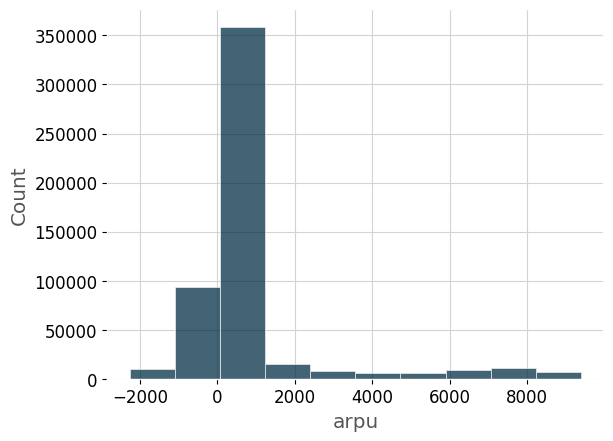

In [113]:
# Create hisogram for new claim value
sns.histplot(eda_data['arpu'], bins=10)

In [114]:
eda_data.columns

Index(['customer_id', 'month_of_joining', 'gender', 'age', 'married',
       'number_of_dependents', 'arpu', 'total_recharge_amount',
       'total_recharge_data', 'arpu_5g', 'arpu_4g', 'referred_a_friend',
       'number_of_referrals', 'phone_service', 'multiple_lines',
       'internet_type', 'payment_method', 'satisfaction_score', 'offer',
       'total_services', 'total_streaming_services', 'total_data_usage_mb',
       'total_outgoing_calls', 'total_incoming_calls', 'month',
       'tenure_months', 'churn'],
      dtype='object')

In [115]:
# Define binary columns
binary_cols = ['married', 'gender']

# Define map values
mapping = {'Yes': 1,
           'No': 0,
           'yes': 1,
           'no': 0,
           'Male': 1,
           'Female': 0,
           }

# Define function to binarise features
def binarise_values(data, cols, map):
    for col in cols:
        data[col] = data[col].map(map)
    return data

# Call function
eda_data = binarise_values(eda_data, binary_cols, mapping)

Correlation Matrix

In [116]:
eda_data.corr(numeric_only=True).sort_values(by='arpu',ascending=False)

,month_of_joining,gender,age,married,number_of_dependents,arpu,total_recharge_amount,total_recharge_data,arpu_5g,arpu_4g,number_of_referrals,phone_service,multiple_lines,satisfaction_score,total_services,total_streaming_services,total_data_usage_mb,total_outgoing_calls,total_incoming_calls,month,tenure_months,churn
arpu,-0.001978,0.001267,0.000525,-0.002771,-0.000514,1.000000,0.033898,0.033653,0.002088,0.000552,0.002384,-0.001631,0.000179,-0.004258,0.000553,-0.000262,0.030869,0.184431,0.142425,-0.003601,-0.002088,0.014269
total_outgoing_calls,-0.005946,0.001140,0.000197,0.000209,0.000372,0.184431,0.305812,0.161036,0.004746,0.005462,0.000115,0.367303,-0.001870,-0.015385,0.102102,-0.015420,0.145966,1.000000,0.636748,-0.008967,-0.004222,0.069624
total_incoming_calls,-0.009609,0.003608,-0.000837,0.001161,0.001441,0.142425,0.320719,0.292406,0.005760,0.008662,0.000780,0.051523,-0.002573,-0.019294,0.013770,-0.001776,0.259787,0.636748,1.000000,-0.012909,-0.005074,0.093250
total_recharge_amount,-0.003171,-0.000471,0.000614,-0.000413,0.001180,0.033898,1.000000,0.200252,0.006567,0.004739,-0.001907,0.274375,-0.000895,-0.006872,0.076282,-0.011797,0.297857,0.305812,0.320719,-0.002986,-0.000265,0.026765
total_recharge_data,-0.003046,-0.000074,-0.000163,-0.000383,-0.001950,0.033653,0.200252,1.000000,-0.092500,-0.092154,0.012077,-0.010766,-0.000694,-0.005097,0.475888,0.110283,0.550419,0.161036,0.292406,-0.002175,0.000507,0.025107
total_data_usage_mb,-0.003003,0.000689,0.002123,-0.000467,-0.001710,0.030869,0.297857,0.550419,-0.065205,-0.070904,0.007212,-0.003923,0.000403,-0.002603,0.285502,0.067372,1.000000,0.145966,0.259787,-0.002660,-0.000066,0.022964
churn,-0.091743,-0.002362,-0.000154,0.001359,-0.000407,0.014269,0.026765,0.025107,0.001501,0.000048,0.002372,-0.000125,0.000785,-0.201138,0.000629,0.001970,0.022964,0.069624,0.093250,-0.132757,-0.058954,1.000000
number_of_referrals,0.001732,0.000644,-0.000550,-0.000581,-0.002487,0.002384,-0.001907,0.012077,-0.004355,-0.004030,1.000000,-0.004475,-0.002268,0.000500,0.008814,0.065967,0.007212,0.000115,0.000780,-0.000007,-0.001666,0.002372
arpu_5g,-0.000181,0.001260,-0.000419,0.001993,-0.001920,0.002088,0.006567,-0.092500,1.000000,0.036599,-0.004355,0.001164,-0.000804,-0.001075,-0.128545,-0.029547,-0.065205,0.004746,0.005760,-0.002029,-0.002071,0.001501
gender,-0.004538,1.000000,0.015452,-0.003796,-0.006093,0.001267,-0.000471,-0.000074,0.001260,-0.000557,0.000644,-0.000541,-0.000631,-0.001341,-0.002095,-0.000547,0.000689,0.001140,0.003608,-0.000564,0.003722,-0.002362


<Axes: >

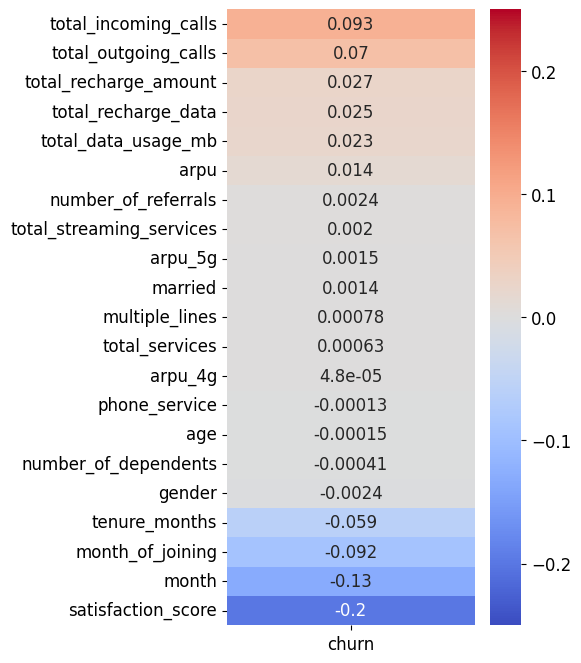

In [117]:
fig, ax = plt.subplots(figsize=(4, 8))

corr_matrix = eda_data.corr(numeric_only=True).sort_values(by='churn',ascending=False)
corr_matrix_no_claim = corr_matrix.drop('churn')

sns.heatmap(corr_matrix_no_claim[['churn']],cmap='coolwarm', annot=True, vmax=0.25, vmin=-0.25)

# Key Insights from Churn Correlation Analysis

- **Highest Churn Risk Factors**: Heavy call users (incoming: 0.093, outgoing: 0.07), frequent rechargers (0.027), and high data users (0.023)

- **Strongest Retention Factors**: Customer satisfaction (-0.2) and recent customer acquisition (-0.092)

- **Strategic Focus Areas**:
  1. Target retention efforts on high-value, high-usage customers who show elevated churn risk
  2. Prioritize satisfaction improvement initiatives over adding services
  3. Refresh engagement for long-tenured customers who show higher churn propensity
  4. Address service quality for heavy call/data users rather than demographic-based segmentation

- **Notable Finding**: Higher-paying customers (ARPU: 0.014) show slightly increased churn risk, representing potential revenue leakage from valuable segments

Data Cleaning and Preprocessing

In [118]:
X_train_raw = X_train.copy()

In [119]:
X_train_raw.isna().sum().sort_values(ascending=False).head()

internet_type           260066
total_recharge_data     167919
multiple_lines           36833
number_of_dependents      3950
number_of_referrals        310
dtype: int64

In [120]:
X_train_raw.isna().sum().sort_values(ascending=False).head()/len(X_train_raw)*100

internet_type           49.725622
total_recharge_data     32.106761
multiple_lines           7.042612
number_of_dependents     0.755255
number_of_referrals      0.059273
dtype: float64

There is a fairly significant number of missing values. We will need to deal with these when developing the data pipeline. As there are quite a lot of missing values, and many of which are numerical, simple imputation like median or mean may be too naive. Instead, let's impute using interpolation for more advanced imputation.

In [121]:
# Create the imputer
knn_imputer = KNNImputer(n_neighbors=2)

# Define the numerical columns
numerical_cols_df = X_train_raw.select_dtypes(include=['number'])
numerical_cols = numerical_cols_df.columns.tolist()

# Define the categorial columns for use later
cat_cols_df = X_train_raw.select_dtypes(include=['object'])
cat_cols = cat_cols_df.columns.tolist()

In [ ]:
# Define function to impute num features using KNN
def num_knn_impute(data, cols, imputer):
    data = data[cols]
    data_imputed = pd.DataFrame(imputer.fit_transform(data))
    data_imputed.columns = data.columns
    return data_imputed

# Run the function to impute numerical values with knn
num_test_data_imputed = num_knn_impute(X_train_raw, numerical_cols, knn_imputer)

In [ ]:
# Get numerical cols as a df
num_cols_df = X_train_raw[numerical_cols].reset_index(drop=True)
# Select rows with missing values and show head
missing_data_df = num_cols_df[num_cols_df.isna().any(axis=1)]
missing_data_df.head()

In [ ]:
# Show same records after imputation
samples = missing_data_df.index.to_list()
num_test_data_imputed.loc[samples].head()

In [ ]:
# Rejoin dfs
train_imputed_df = pd.concat([num_test_data_imputed, cat_test_data_imputed], axis=1)
# Check head
train_imputed_df.head()

In [ ]:
train_imputed_df.isnull().sum()

Categorical Feature Encoding